### Data Loading & Data Understanding

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('/kaggle/input/fertility-data-set/fertility.csv')

# check the dimension of the dataset
print('Dimension of dataset: ', data.shape)

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view the first 5 rows of the dataset
data.head()

Dimension of dataset:  (100, 10)
Attributes in the dataset:  ['Season' 'Age' 'Childish diseases' 'Accident or serious trauma'
 'Surgical intervention' 'High fevers in the last year'
 'Frequency of alcohol consumption' 'Smoking habit'
 'Number of hours spent sitting per day' 'Diagnosis']


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


#### Attributes Description:

1. Season - Season in which the analysis was performed
2. Age - Age of the volunteer at the time of analysis
3. Childish diseases - (example: chicken pox, measles, mumps, polio); yes or no
4. Accident or serious trauma - injury history; yes or no
5. Surgical intervention - history of surgical intervention; yes or no
6. High fevers in the last year - history of high fevers in the last year; less than three months ago, more than three months ago, no.
7. Frequency of alcohol consumption - frequency of alcohol consumption
8. Smoking habit - smoking habit
9. Number of hours spent sitting per day - daily sitting hours
10. Diagnosis - diagnosis of semen concentration; normal or altered

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


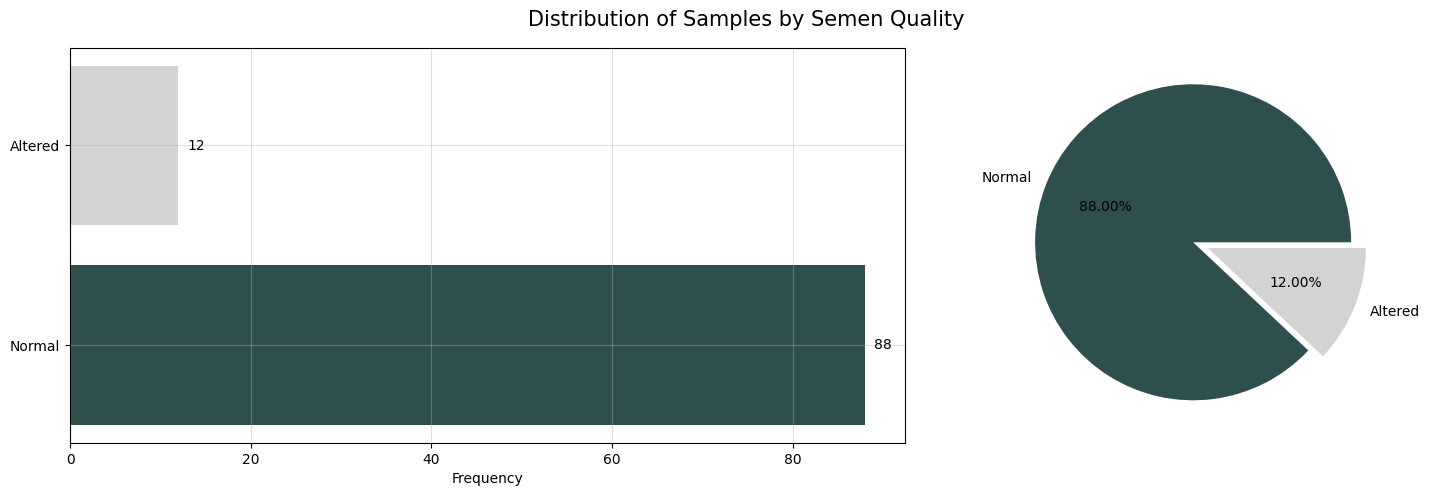

In [4]:
# distribution of samples by semen concentration
diagnosis = data['Diagnosis'].value_counts()
colors = ['darkslategray','lightgray']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(diagnosis.index, width=diagnosis.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(diagnosis):
    axes[0].text(values+1, index, str(values), va='center')
    
axes[1].pie(diagnosis.values, labels=diagnosis.index, autopct='%.2f%%', explode=([0.05]*len(diagnosis.index)), colors=colors)
figure.suptitle('Distribution of Samples by Semen Quality', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# Exploratory Data Analysis (EDA) 
#### Question 1 | Is there a statistically significant association between the season in which the analysis was performed and diagnosis of semen concentration; normal or altered?

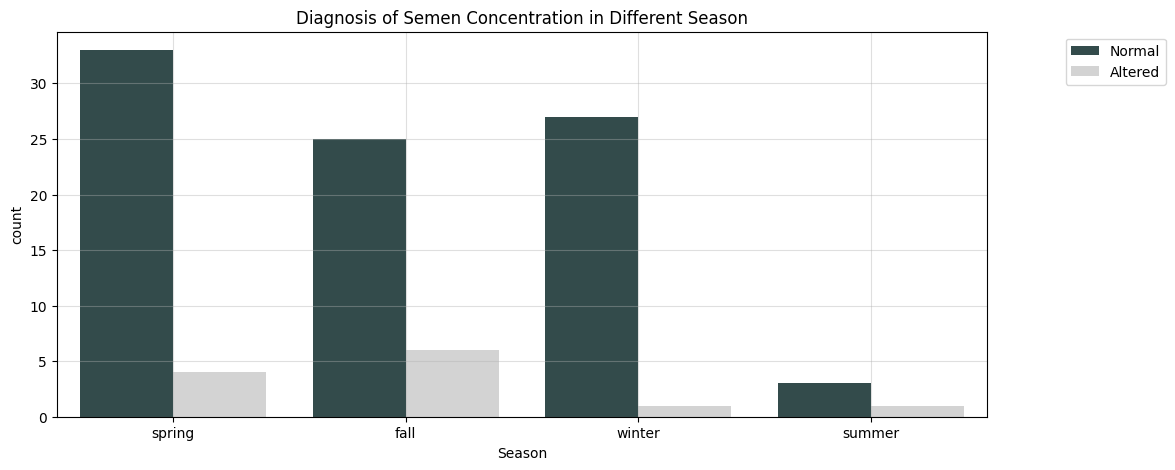

Observed value: 


Diagnosis,Altered,Normal
Season,,
fall,6,25
spring,4,33
summer,1,3
winter,1,27


Expected frequency: 


Diagnosis,Altered,Normal
Season,,
fall,3.72,27.28
spring,4.44,32.56
summer,0.48,3.52
winter,3.36,24.64


Test statistic:  4.1613
Test p-value:  0.2446
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the season in which the analysis was performed and diagnosis of semen concentration; normal or altered in the analyzed data.


In [5]:
from scipy.stats import chi2_contingency

# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Season'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration in Different Season')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Season'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the season in which the analysis was performed and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the season in which the analysis was performed and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 2 | Is there a statistically significant association between the presence of childish diseases and diagnosis of semen concentration; normal or altered?

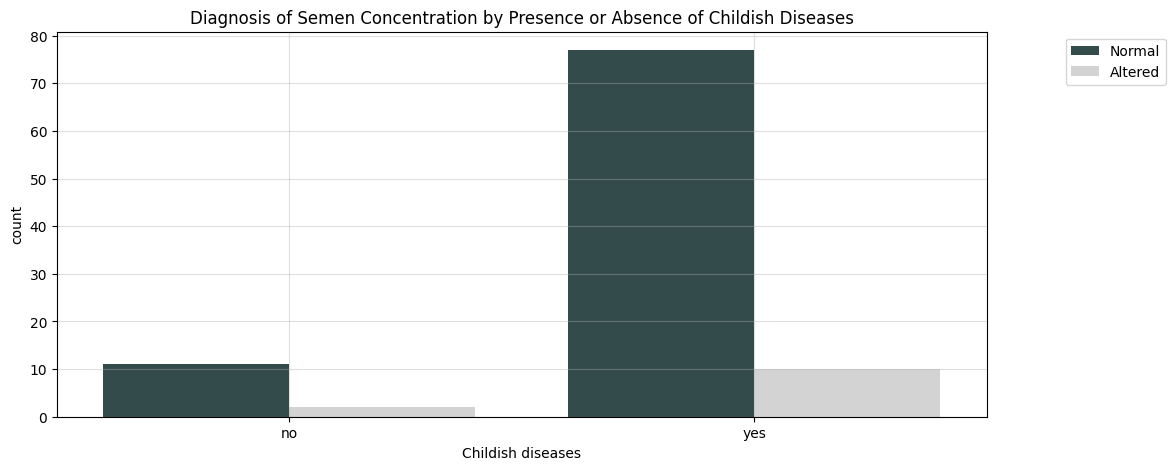

Observed value: 


Diagnosis,Altered,Normal
Childish diseases,,
no,2,11
yes,10,77


Expected frequency: 


Diagnosis,Altered,Normal
Childish diseases,,
no,1.56,11.44
yes,10.44,76.56


Test statistic:  0.0
Test p-value:  1.0
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the presence of childish diseases and diagnosis of semen concentration; normal or altered in the analyzed data.


In [6]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Childish diseases'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Presence or Absence of Childish Diseases')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Childish diseases'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the presence of childish diseases and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the presence of childish diseases and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 3 | Is there a statistically significant association between the injury history and diagnosis of semen concentration; normal or altered?

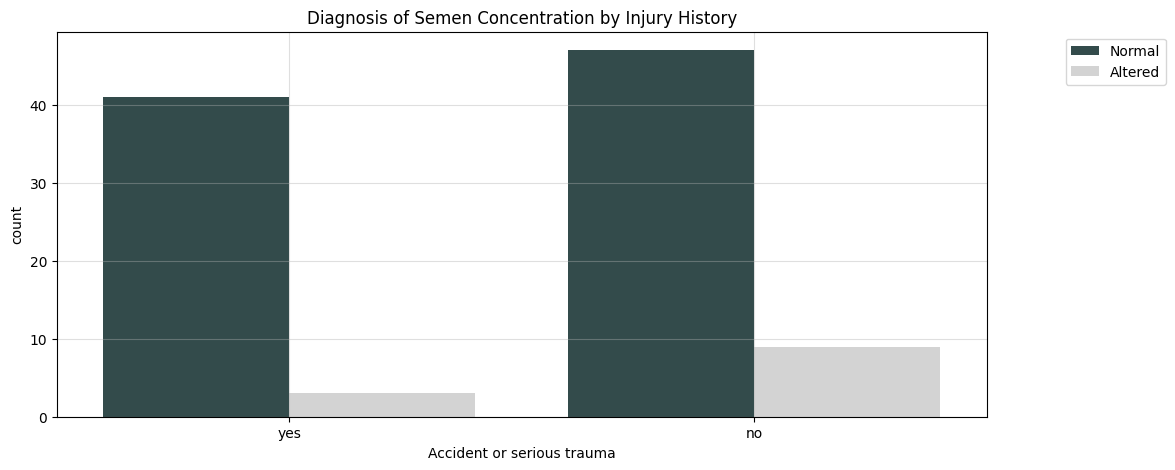

Observed value: 


Diagnosis,Altered,Normal
Accident or serious trauma,,
no,9,47
yes,3,41


Expected frequency: 


Diagnosis,Altered,Normal
Accident or serious trauma,,
no,6.72,49.28
yes,5.28,38.72


Test statistic:  1.2177
Test p-value:  0.2698
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the injury history and diagnosis of semen concentration; normal or altered in the analyzed data.


In [7]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Accident or serious trauma'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Injury History')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Accident or serious trauma'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the injury history and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the injury history and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 4 | Is there a statistically significant association between the surgical history and diagnosis of semen concentration; normal or altered?

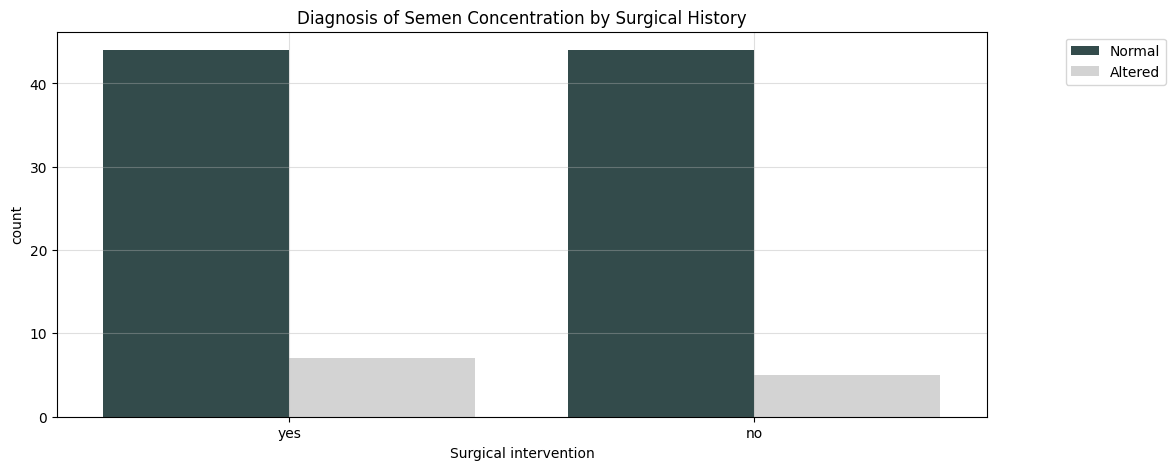

Observed value: 


Diagnosis,Altered,Normal
Surgical intervention,,
no,5,44
yes,7,44


Expected frequency: 


Diagnosis,Altered,Normal
Surgical intervention,,
no,5.88,43.12
yes,6.12,44.88


Test statistic:  0.0547
Test p-value:  0.815
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the surgical history and diagnosis of semen concentration; normal or altered in the analyzed data.


In [8]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Surgical intervention'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Surgical History')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Surgical intervention'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the surgical history and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the surgical history and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 5 | Is there a statistically significant association between the fever history in the past year and diagnosis of semen concentration; normal or altered?

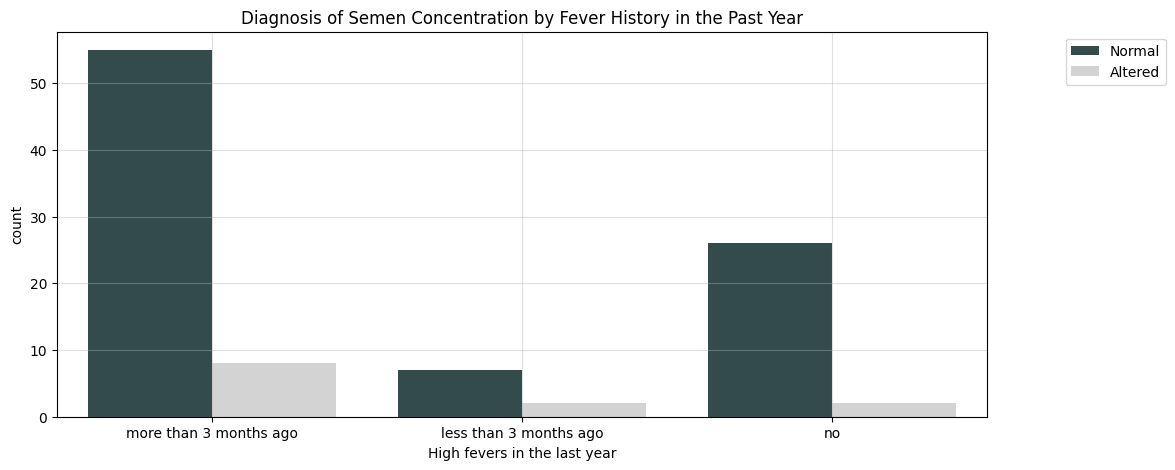

Observed value: 


Diagnosis,Altered,Normal
High fevers in the last year,,
less than 3 months ago,2,7
more than 3 months ago,8,55
no,2,26


Expected frequency: 


Diagnosis,Altered,Normal
High fevers in the last year,,
less than 3 months ago,1.08,7.92
more than 3 months ago,7.56,55.44
no,3.36,24.64


Test statistic:  1.5452
Test p-value:  0.4618
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the fever history in the past year and diagnosis of semen concentration; normal or altered in the analyzed data.


In [9]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['High fevers in the last year'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Fever History in the Past Year')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['High fevers in the last year'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the fever history in the past year and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the fever history in the past year and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 6 | Is there a statistically significant association between the frequency of alcohol consumption and diagnosis of semen concentration; normal or altered?

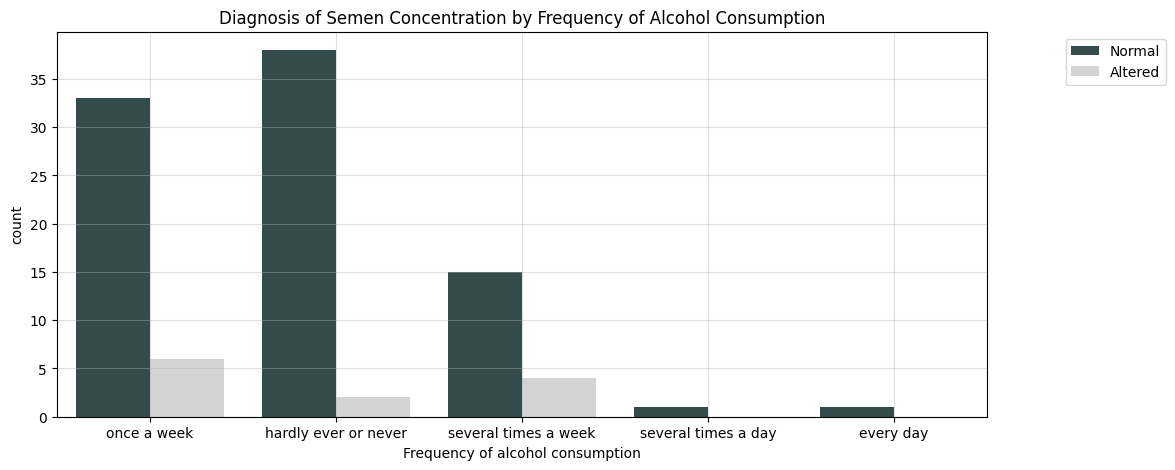

Observed value: 


Diagnosis,Altered,Normal
Frequency of alcohol consumption,,
every day,0,1
hardly ever or never,2,38
once a week,6,33
several times a day,0,1
several times a week,4,15


Expected frequency: 


Diagnosis,Altered,Normal
Frequency of alcohol consumption,,
every day,0.12,0.88
hardly ever or never,4.80,35.20
once a week,4.68,34.32
several times a day,0.12,0.88
several times a week,2.28,16.72


Test statistic:  4.0263
Test p-value:  0.4025
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the frequency of alcohol consumption and diagnosis of semen concentration; normal or altered in the analyzed data.


In [10]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Frequency of alcohol consumption'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Frequency of Alcohol Consumption')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Frequency of alcohol consumption'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the frequency of alcohol consumption and diagnosis of semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the frequency of alcohol consumption and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 7 | Is there a statistically significant association between smoking habit and diagnosis of semen concentration; normal or altered?

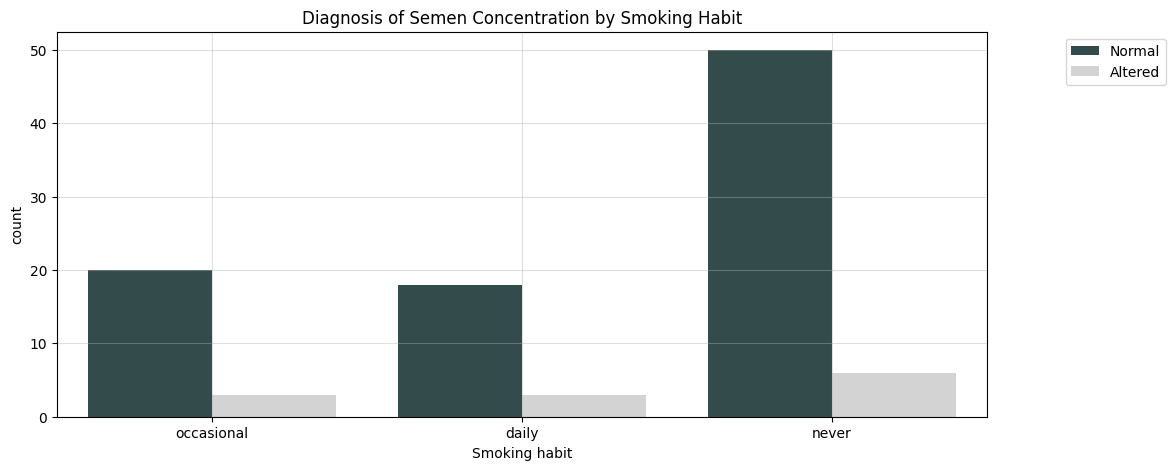

Observed value: 


Diagnosis,Altered,Normal
Smoking habit,,
daily,3,18
never,6,50
occasional,3,20


Expected frequency: 


Diagnosis,Altered,Normal
Smoking habit,,
daily,2.52,18.48
never,6.72,49.28
occasional,2.76,20.24


Test statistic:  0.2153
Test p-value:  0.898
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between smoking habit and diagnosis of semen concentration; normal or altered in the analyzed data.


In [11]:
# visualization
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x=data['Smoking habit'], hue=data['Diagnosis'], palette=colors)
plt.title('Diagnosis of Semen Concentration by Smoking Habit')
plt.grid(alpha=0.4)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# observed value - contingency table
contingency_table = pd.crosstab(data['Smoking habit'], data['Diagnosis'])
print('Observed value: ')
display(contingency_table)

# Chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency: ')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the smoking habit and semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between smoking habit and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 8 | Is there a statistically significant association between age and diagnosis of semen concentration; normal or altered?

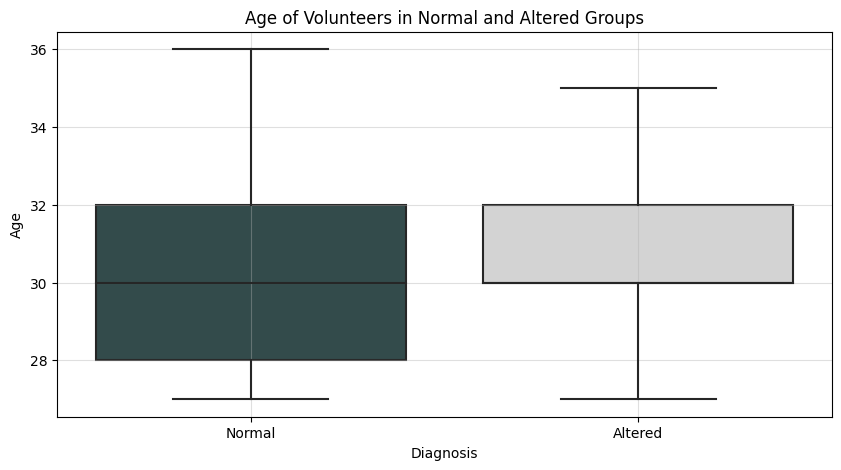

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
Altered,12.0,30.666667,1.922751,27.0,30.0,30.0,32.0,35.0
Normal,88.0,30.034091,2.286637,27.0,28.0,30.0,32.0,36.0


Test statistic:  421.5
Test p-value:  0.2493
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the age of volunteers and diagnosis of semen concentration; normal or altered in the analyzed data.


In [12]:
from scipy.stats import mannwhitneyu

# visualization
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data, y=data['Age'], x=data['Diagnosis'], palette=colors)
plt.title('Age of Volunteers in Normal and Altered Groups')
plt.grid(alpha=0.4)
plt.show()

# display summary statistic
groups = data.groupby('Diagnosis')
display(groups['Age'].describe())
normal = groups.get_group('Normal')
altered = groups.get_group('Altered')

# Mann-Whitney U test
res = mannwhitneyu(normal['Age'], altered['Age'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the age of volunteers and semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the age of volunteers and diagnosis of semen concentration; normal or altered in the analyzed data.')

#### Question 9 | Is there a statistically significant association between daily sitting hours of the volunteers and diagnosis of semen concentration; normal or altered?

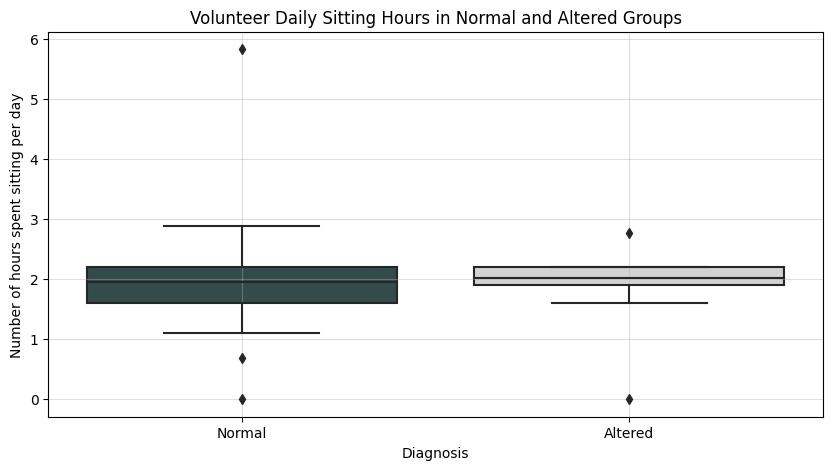

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
Altered,12.0,7.666667,3.446562,1.0,6.75,7.5,9.0,16.0
Normal,88.0,11.227273,35.818100,1.0,5.00,7.0,9.0,342.0


Test statistic:  497.0
Test p-value:  0.7444
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the daily sitting hours of volunteers and diagnosis of semen concentration; normal or altered in the analyzed data.


In [13]:
from scipy.stats import mannwhitneyu

# visualization
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data, y=np.log(data['Number of hours spent sitting per day']), x=data['Diagnosis'], palette=colors)
plt.title('Volunteer Daily Sitting Hours in Normal and Altered Groups')
plt.grid(alpha=0.4)
plt.show()

# display summary statistic
groups = data.groupby('Diagnosis')
display(groups['Number of hours spent sitting per day'].describe())
normal = groups.get_group('Normal')
altered = groups.get_group('Altered')

# Mann-Whitney U test
res = mannwhitneyu(normal['Number of hours spent sitting per day'], altered['Number of hours spent sitting per day'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject null hypothesis. There is a statistically significant association between the daily sitting hours of volunteers and semen concentration; normal or altered in the analyzed data.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the daily sitting hours of volunteers and diagnosis of semen concentration; normal or altered in the analyzed data.')

# Conclusion

The analysis focused on a dataset characterized by a small sample size of 100 instances and a notable class imbalance, with 12 instances labeled as altered/abnormal and 88 instances as normal. The dataset comprises 9 features, including season, age, childish disease history, accident or serious trauma, surgical intervention, high fevers in the last year, frequency of alcohol consumption, smoking habit, and the number of hours spent sitting per day.

To investigate the association between these features and the outcome (normal vs. altered semen concentration), the analysis employed both the chi-square test and the Mann-Whitney U test. Despite these efforts, the statistical analysis did not identify any feature that was statistically significantly associated with the outcome. This implies that, based on the available data and the chosen tests, no single feature showed a clear and robust association with the altered semen concentration.

**Future Directions:**

1. **Exploration of Additional Variables:** Consider the inclusion of additional relevant variables or exploring potential interactions between existing variables. This may provide a more comprehensive understanding of factors influencing semen concentration.

2. **Data Collection Expansion:** Increase the dataset size to enhance statistical power and improve the reliability of the analysis. Larger sample sizes can contribute to better generalization of results.

3. **Feature Engineering:** Explore the possibility of creating derived features or combining existing features to capture more complex relationships that may influence semen concentration.

4. **Advanced Modeling Techniques:** Consider employing more sophisticated modeling techniques, such as machine learning algorithms (e.g., logistic regression, decision trees, random forests), to uncover subtle patterns and associations in the data.

5. **Longitudinal Studies:** If feasible, design and implement longitudinal studies to track changes in semen concentration over time. This approach can provide insights into temporal associations and causal relationships.

6. **Domain Expert Consultation:** Collaborate with domain experts in reproductive health to gain insights into potential unmeasured factors or nuances in the dataset that could be influencing semen concentration.

By incorporating these future directions, the analysis can evolve to provide a more comprehensive understanding of the factors influencing altered semen concentration, potentially leading to more accurate predictions and targeted interventions.